In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from itertools import product

pd.set_option('display.max_rows', 15)
np.random.seed(5)

sns.set()

In [2]:
from google.colab import drive
drive.mount('/content/drive')
bowler = pd.read_csv('/content/drive/MyDrive/Diss/Code/CSV/bowlers_for_clustering.csv')

Mounted at /content/drive


In [3]:
bowler_for_clustering = bowler.copy().drop(['name','country','prelim_metric','pre-rank'],axis=1)
bowler_for_clustering

,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index
0,19.88,17.8,6.67,22.377,1.253,0.063,1.056,24.905
1,24.58,17.9,8.19,22.167,1.233,0.022,1.159,30.322
2,13.00,12.7,6.12,22.741,1.787,0.098,1.509,23.246
3,20.79,16.8,7.42,21.651,1.289,0.036,1.162,26.807
4,24.44,22.1,6.63,22.342,1.010,0.031,0.915,24.701
...,...,...,...,...,...,...,...,...
1080,66.00,53.0,7.47,12.750,0.250,0.000,0.250,16.500
1081,62.00,42.0,8.85,10.500,0.250,0.000,0.250,15.500
1082,51.00,42.0,7.28,8.400,0.200,0.000,0.200,10.200
1083,75.00,60.0,7.50,15.000,0.250,0.000,0.250,18.750


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bowler_for_clustering_scaled= scaler.fit_transform(bowler_for_clustering)

In [5]:
bowler_for_clustering_scaled

array([[-0.48949716, -0.41242103, -0.55278625, ...,  0.89240173,
         0.47405299,  0.48108026],
       [-0.24742892, -0.40464518,  0.52879626, ...,  0.03271766,
         0.75586625,  1.49066717],
       [-0.84384386, -0.80898936, -0.94414834, ...,  1.62627838,
         1.71348411,  0.17188612],
       ...,
       [ 1.11330362,  1.46933458, -0.11873011, ..., -0.42857623,
        -1.86800669, -2.25954655],
       [ 2.34939677,  2.86898751,  0.03781473, ..., -0.42857623,
        -1.73120414, -0.66605051],
       [ 1.11330362,  1.46933458, -0.11873011, ..., -0.42857623,
        -1.73120414, -1.78429335]])

In [6]:
!pip install minisom
from minisom import MiniSom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9018 sha256=1a6890e9d21733547a47deb4f99cda46cb2ff885d62aa3d2b30b3450fcf5dcab
  Stored in directory: /root/.cache/pip/wheels/d4/ca/4a/488772b0399fec45ff53132ed14c948dec4b30deee3a532f80
Successfully built minisom


In [7]:
som = MiniSom(x=4,y=1,input_len=8,sigma=1.0,learning_rate=0.5)
som.random_weights_init(bowler_for_clustering_scaled)

/usr/local/lib/python3.7/dist-packages/minisom.py:160: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')


In [8]:
som.train_random(data = bowler_for_clustering_scaled, num_iteration = 100)

In [9]:
som.get_weights()

array([[[-0.16216776, -0.20213224,  0.14179209, -0.09571713,
         -0.17276924, -0.10161878, -0.15987844,  0.03902261]],

       [[-0.43284226, -0.35480709, -0.48660123,  0.75798578,
          0.44298281,  0.11736919,  0.46292057,  0.23215613]],

       [[-0.61867463, -0.65034759, -0.28683198,  0.97799183,
          1.31738847,  1.11264863,  1.05341076,  0.59593566]],

       [[-0.3247022 , -0.44205947,  0.36468054,  0.92872784,
          0.74933566,  0.08681828,  0.82573547,  1.17208836]]])

In [10]:
som.pca_weights_init(bowler_for_clustering_scaled)

/usr/local/lib/python3.7/dist-packages/minisom.py:374: UserWarning: PCA initialization inappropriate:One of the dimensions of the map is 1.
  warn(msg)


In [11]:
!pip install sklearn_som
from sklearn_som.som import SOM

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
batter_som = SOM(m=5, n=1, dim=8)
batter_som.fit(bowler_for_clustering_scaled)

In [13]:
predictions = batter_som.predict(bowler_for_clustering_scaled)

In [14]:
predictions

array([4, 3, 4, ..., 0, 0, 0])

In [15]:
batter_som.weights

array([[ 0.94256234,  1.01707974,  0.3713083 , -0.86017428, -1.08513406,
        -0.35246961, -1.0735414 , -0.49344716],
       [ 0.29931748,  0.33853037,  0.18738256, -0.3286673 , -0.65088355,
        -0.32360542, -0.59815207, -0.11552949],
       [ 0.20707612,  0.09037752,  0.53842917,  0.32242788, -0.24374357,
        -0.22967827, -0.17999386,  0.77372133],
       [-0.24986746, -0.31946681,  0.104485  ,  0.68099482,  0.54462403,
         0.21261273,  0.52247969,  0.70069374],
       [-0.64073638, -0.58758921, -0.66568166,  0.76484504,  1.13868121,
         0.51044528,  1.0679042 ,  0.064031  ]])

In [16]:
silhouette_score(bowler_for_clustering_scaled, predictions)

0.1332748523139516

In [17]:
bowler['class'] = predictions 

In [18]:
bowler['class'].value_counts()

1    268
4    252
3    233
0    170
2    162
Name: class, dtype: int64

In [19]:
bowler

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,prelim_metric,pre-rank,class
0,Shakib Al Hasan,BAN,19.88,17.8,6.67,22.377,1.253,0.063,1.056,24.905,22.100,Best,4
1,TG Southee,NZ,24.58,17.9,8.19,22.167,1.233,0.022,1.159,30.322,33.552,Good,3
2,Rashid Khan,AFG,13.00,12.7,6.12,22.741,1.787,0.098,1.509,23.246,13.260,Best,4
3,SL Malinga,SL,20.79,16.8,7.42,21.651,1.289,0.036,1.162,26.807,25.710,Best,3
4,Shahid Afridi,PAK,24.44,22.1,6.63,22.342,1.010,0.031,0.915,24.701,27.006,Best,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,S Thanikaithasan,DEN,66.00,53.0,7.47,12.750,0.250,0.000,0.250,16.500,82.170,Poor,0
1081,JJ Tucker,BMUDA,62.00,42.0,8.85,10.500,0.250,0.000,0.250,15.500,91.450,Poor,0
1082,CL White,AUS,51.00,42.0,7.28,8.400,0.200,0.000,0.200,10.200,61.880,Poor,0
1083,Zahid Khan,SLE,75.00,60.0,7.50,15.000,0.250,0.000,0.250,18.750,93.750,Poor,0


In [20]:
bowler[bowler['class'] == 0]

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,prelim_metric,pre-rank,class
96,Mahmudullah,BAN,26.94,22.4,7.19,12.203,0.544,0.0,0.544,14.662,32.283,Good,0
215,JP Duminy,SA,28.52,22.0,7.76,11.283,0.512,0.0,0.512,14.610,36.886,Good,0
224,Sikandar Raza,ZIM,34.14,27.4,7.46,14.400,0.525,0.0,0.525,17.925,42.447,Average,0
245,PR Stirling,IRE,33.95,27.3,7.46,13.000,0.476,0.0,0.476,16.167,42.211,Average,0
359,Karim Sadiq,AFG,34.42,30.0,6.88,15.000,0.500,0.0,0.500,17.214,39.468,Good,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,S Thanikaithasan,DEN,66.00,53.0,7.47,12.750,0.250,0.0,0.250,16.500,82.170,Poor,0
1081,JJ Tucker,BMUDA,62.00,42.0,8.85,10.500,0.250,0.0,0.250,15.500,91.450,Poor,0
1082,CL White,AUS,51.00,42.0,7.28,8.400,0.200,0.0,0.200,10.200,61.880,Poor,0
1083,Zahid Khan,SLE,75.00,60.0,7.50,15.000,0.250,0.0,0.250,18.750,93.750,Poor,0


In [21]:
bowler[bowler['class'] == 1]

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,prelim_metric,pre-rank,class
28,Mohammad Hafeez,PAK,22.75,20.6,6.60,15.957,0.772,0.013,0.731,17.570,25.025,Best,1
36,PM Seelaar,NED,22.24,19.5,6.83,17.662,0.906,0.016,0.857,20.156,25.317,Best,1
69,DJG Sammy,WI,25.36,20.8,7.31,15.498,0.746,0.034,0.614,18.915,30.897,Good,1
77,KA Pollard,WI,28.28,20.3,8.32,13.562,0.667,0.016,0.613,18.857,39.215,Good,1
89,AD Russell,WI,34.97,22.8,9.18,15.889,0.696,0.000,0.696,24.357,53.504,Average,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,K Vislapuu,EST,28.66,22.0,7.81,16.500,0.750,0.000,0.750,21.500,37.306,Poor,1
984,RR Watson,SCOT,30.66,20.0,9.20,12.000,0.600,0.000,0.600,18.400,47.012,Poor,1
989,Abdullah Sheikh,NOR,39.50,36.0,6.58,18.000,0.500,0.000,0.500,19.750,43.318,Poor,1
1001,AP Devcich,NZ,40.00,36.0,6.66,18.000,0.500,0.000,0.500,20.000,44.400,Poor,1


In [22]:
bowler[bowler['class'] == 2]

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,prelim_metric,pre-rank,class
12,Mohammad Nabi,AFG,27.92,23.1,7.25,19.712,0.854,0.034,0.744,23.843,33.737,Good,2
47,NLTC Perera,SL,33.66,21.6,9.34,16.424,0.761,0.000,0.761,25.627,52.397,Average,2
51,PVD Chameera,SL,30.27,22.3,8.14,21.396,0.960,0.020,0.898,29.060,41.066,Average,2
53,RA Jadeja,INDIA,27.45,23.3,7.04,20.046,0.857,0.000,0.857,23.536,32.208,Good,2
74,Mashrafe Mortaza,BAN,36.35,27.1,8.04,21.453,0.792,0.019,0.731,28.811,48.709,Average,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,Tahir Dar,BHR,42.66,28.0,9.14,21.000,0.750,0.000,0.750,32.000,64.985,Poor,2
980,HER Tyler,PHI,66.00,38.0,10.42,19.000,0.500,0.000,0.500,33.000,114.620,Poor,2
983,K Waiswa,UGA,48.00,28.0,10.28,16.800,0.600,0.000,0.600,28.800,82.240,Poor,2
985,RM West,IRE,47.33,38.0,7.47,22.800,0.600,0.000,0.600,28.400,58.926,Poor,2


In [23]:
bowler[bowler['class'] == 3]

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,prelim_metric,pre-rank,class
1,TG Southee,NZ,24.58,17.9,8.19,22.167,1.233,0.022,1.159,30.322,33.552,Good,3
3,SL Malinga,SL,20.79,16.8,7.42,21.651,1.289,0.036,1.162,26.807,25.710,Best,3
4,Shahid Afridi,PAK,24.44,22.1,6.63,22.342,1.010,0.031,0.915,24.701,27.006,Best,3
5,Mustafizur Rahman,BAN,19.65,15.5,7.57,21.467,1.381,0.063,1.186,27.143,24.792,Best,3
7,IS Sodhi,NZ,21.97,16.3,8.05,21.216,1.297,0.031,1.210,28.500,29.476,Best,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,CP Schofield,ENG,23.00,19.2,7.16,18.750,1.000,0.000,1.000,23.000,27.447,Poor,3
909,Usman Khan,Fran,20.75,19.5,6.38,19.500,1.000,0.000,1.000,20.750,22.064,Poor,3
910,TCW Veillard,GUE,23.25,24.0,5.81,24.000,1.000,0.000,1.000,23.250,22.514,Poor,3
914,Yasir Mehmood,CYP,20.75,18.0,6.91,18.000,1.000,0.000,1.000,20.750,23.897,Poor,3


In [24]:
bowler[bowler['class'] == 4]

,name,country,average,strike_rate,economy,balls_bolwed_per_innings,wicket_index,big_impact_index,short_impact_index,runs_index,prelim_metric,pre-rank,class
0,Shakib Al Hasan,BAN,19.88,17.8,6.67,22.377,1.253,0.063,1.056,24.905,22.100,Best,4
2,Rashid Khan,AFG,13.00,12.7,6.12,22.741,1.787,0.098,1.509,23.246,13.260,Best,4
6,Saeed Ajmal,PAK,17.83,16.8,6.36,22.686,1.349,0.063,1.169,24.063,18.900,Best,4
13,S Lamichhane,NEPAL,12.76,12.0,6.34,22.538,1.872,0.051,1.757,23.897,13.483,Best,4
15,JJ Bumrah,INDIA,19.89,18.3,6.50,21.911,1.196,0.000,1.196,23.804,21.548,Best,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
856,KJ Ferrary,GIBR,19.50,19.5,6.00,19.500,1.000,0.000,1.000,19.500,19.500,Poor,4
860,MG Hunter,GIBR,15.75,17.2,5.47,16.950,1.000,0.000,1.000,15.750,14.359,Poor,4
869,A Lark,Aut,13.75,16.5,5.00,16.500,1.000,0.000,1.000,13.750,11.458,Poor,4
875,Mohammad Kamran,ESP,18.50,22.5,4.93,22.500,1.000,0.000,1.000,18.500,15.201,Poor,4


(1085, 8)
(1085, 2)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


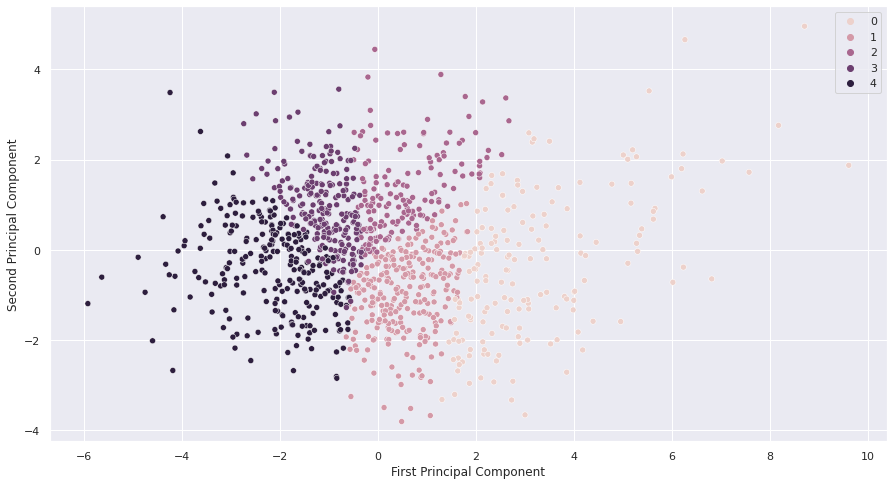

array([ True,  True,  True,  True,  True,  True,  True,  True])

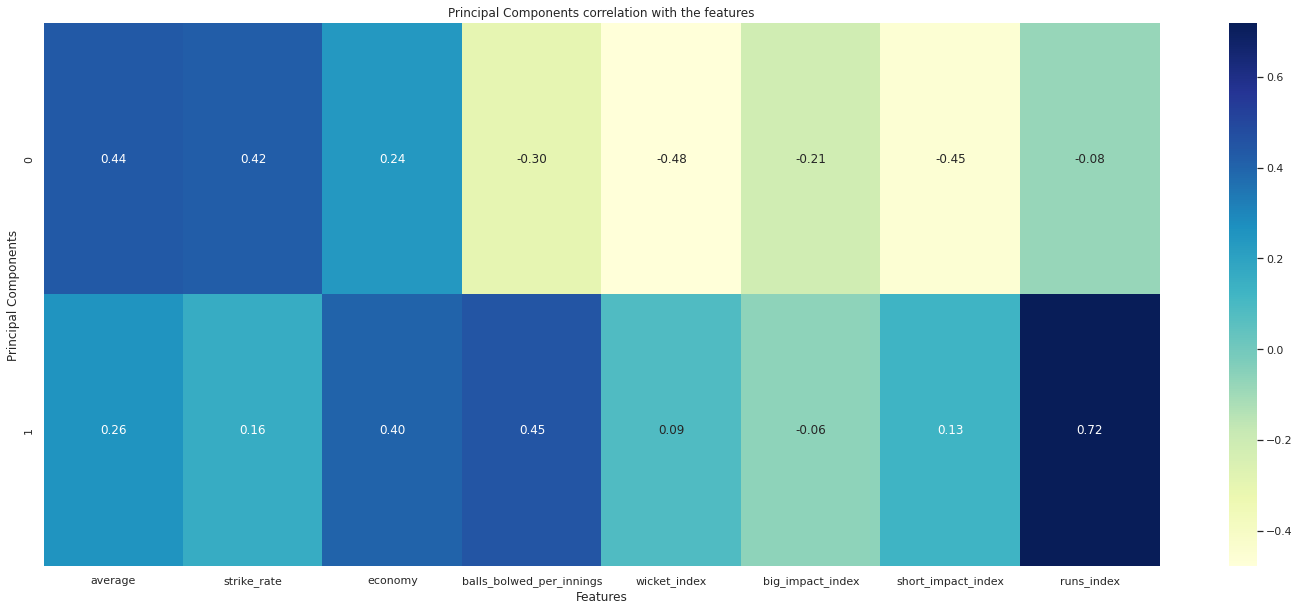

In [25]:
pca = PCA(n_components=2)

pca.fit(bowler_for_clustering_scaled)

x_pca = pca.transform(bowler_for_clustering_scaled)

print(bowler_for_clustering_scaled.shape)

print(x_pca.shape)

fig = plt.figure(figsize=(15, 8))
sns.scatterplot(x_pca[:,0], x_pca[:,1],hue=predictions)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

columns = bowler_for_clustering.columns.tolist()
df = pd.DataFrame(pca.components_ , columns=columns)

fig = plt.figure(figsize=(25, 10))
sns.heatmap(df,cmap='YlGnBu',annot=True,fmt=".2f")
plt.title('Principal Components correlation with the features')
plt.xlabel('Features')
plt.ylabel('Principal Components')

from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(0.5)
selector.fit_transform(bowler_for_clustering_scaled)

selector.get_support()